In [48]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\wrist\Anaconda3\envs\handpose\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Building a simulator in 2D

In [215]:
# Rotation matrix to skew ellipse by theta degrees
theta = 30 * 3.14 / 180
rotation = numpy.asarray([[cos(theta), sin(theta)],
                         [-sin(theta), cos(theta)]])

In [216]:
# Perfect sensor
def sense(x):
    return x

### Euler integration

In [217]:
def simulate(dt, x, u):
    x += dt * u
    return x

### Control policy

In [434]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = 2 * -sin(t)
    uy = cos(t)
    return array([ux, uy]).dot(rotation)

### Running the simulator (Control Policies and Open Loop Control Problem 1)

In [435]:
tf = 7.
dt = 0.1    # Time step
time = linspace(0.,tf, int(tf / dt) + 1)  # Time interval


# Initial conditions
x = array([4.75, 3])#.dot(rotation)
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(dt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

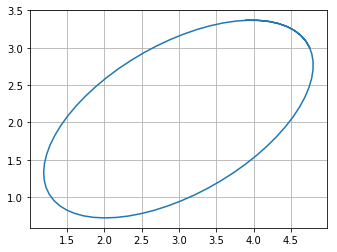

In [436]:
import matplotlib.pyplot as plt

preview_figure = plt.figure()
preview_show = preview_figure.add_subplot(111)
plt.plot(x_log[:,0], x_log[:,1])
plt.grid()
preview_show.set_aspect('equal', adjustable='box')

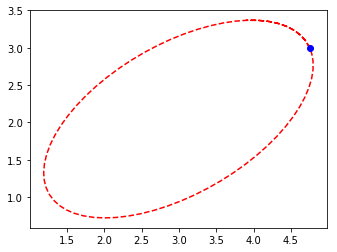

In [418]:
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=30)

HTML(anim.to_jshtml())

### Running the simulator (Control Policies and Open Loop Control Problem 2)

In [479]:
theta = 45 * 3.14 / 180
rotation = numpy.asarray([[cos(theta), sin(theta)],
                         [-sin(theta), cos(theta)]])

In [480]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = -cos(t)
    uy = -cos(t)**2 + sin(t)**2
    return array([ux, uy]).dot(rotation)

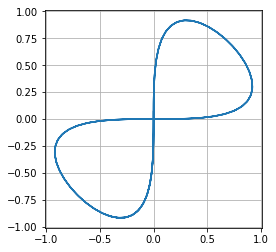

In [486]:
tf = 20.
dt = 0.1    # Time step
time = linspace(0.,tf, int(tf / dt) + 1)  # Time interval


# Initial conditions
x = array([0., 0.07])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(dt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

preview_figure = plt.figure()
preview_show = preview_figure.add_subplot(111)
plt.plot(x_log[:,0], x_log[:,1])
plt.grid()
preview_show.set_aspect('equal', adjustable='box')

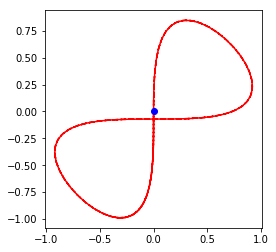

In [482]:
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=30)

HTML(anim.to_jshtml())

### Control Policies and Open Loop Control Problem 3

In [285]:
#3D transition
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = -sin(t)
    uy = cos(t)
    uz = 0.01 * t
    return array([ux, uy, uz])

In [297]:
tf = 10.
dt = 0.1    # Time step
time = linspace(0.,tf, int(tf / dt) + 1)  # Time interval


# Initial conditions
x = array([1., 0., 0.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(dt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

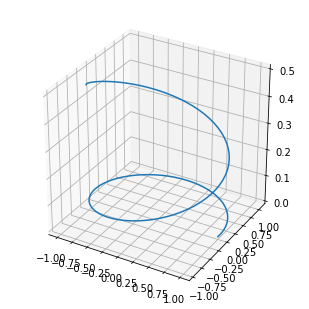

In [298]:
from mpl_toolkits.mplot3d import Axes3D

preview_figure = plt.figure()
preview_show = Axes3D(preview_figure)
plt.plot(x_log[:,0], x_log[:,1], x_log[:,2])

preview_show.set_aspect('equal', adjustable='box')

### Trajectories Problem 1

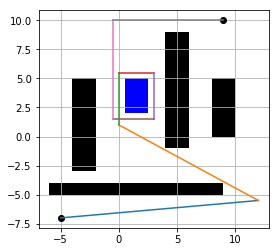

In [334]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

preview_figure = plt.figure()
preview_show = preview_figure.add_subplot(111)

r1 = Rectangle((4.0, -1.0), 6.0 - 4.0, 9.0 - -1.0)
loop = Rectangle((0.5, 2.0), 2.5 - 0.5, 5.0 - 2.0)
r2 = Rectangle((-6.0, -5.0), 9.0 - -6.0, -4.0 - -5.0)
r3 = Rectangle((8.0, 0.0), 10.0 - 8.0, 5.0)
r4 = Rectangle((-4.0, -3.0), -2 - -4, 5 - -3)

obstacles = PatchCollection([r1, r2, r3, r4], facecolor='k')
blue_rect = PatchCollection([loop], facecolor='b')
preview_show.add_collection(obstacles)
preview_show.add_collection(blue_rect)
preview_show.set_aspect('equal', adjustable='box')

plt.plot(-5, -7, 'ko', 9, 10, 'ko')
plt.grid()
preview_show.set_aspect('equal', adjustable='box')

#polyline trajectory:
plt.plot([-5, 12], [-7, -5.5])
plt.plot([12,0],[-5.5,1])
plt.plot([0,0],[1,5.5])
plt.plot([0,3],[5.5,5.5])
plt.plot([3,3],[5.5,1.5])
plt.plot([3,-0.5],[1.5,1.5])
plt.plot([-0.5,-0.5],[1.5,10])
plt.plot([-0.5,9],[10,10])